In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# df_clientes = pd.read_csv("../Datasets/Clientes.csv", sep=",", decimal=",")  ## SUPER MAL 

# df_compra = pd.read_csv("../Datasets/Compra.csv", sep=",")  ## Bien 

# df_gasto = pd.read_csv("../Datasets/Gasto.csv", sep=",")  ## Bien 

# df_localidades = pd.read_csv("../Datasets/Localidades.csv", sep=",")  ## Bien 

# df_proveedores = pd.read_csv("../Datasets/Proveedores_2.csv", sep=",", encoding= "utf-8")
# # df_proveedores2 = pd.read_csv("../Datasets/Proveedores.csv", sep=",", encoding= "utf-8", engine='python')

# df_sucursales = pd.read_csv("../Datasets/Sucursales.csv", sep=";")  ## Bien 

df_venta = pd.read_csv("../Datasets/Venta.csv", sep=",")  ## Bien 

In [3]:
df_venta.head()

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0


In [4]:
columnas = df_venta.columns
columnas

Index(['IdVenta', 'Fecha', 'Fecha_Entrega', 'IdCanal', 'IdCliente',
       'IdSucursal', 'IdEmpleado', 'IdProducto', 'Precio', 'Cantidad'],
      dtype='object')

In [5]:
datos = df_venta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46180 entries, 0 to 46179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdVenta        46180 non-null  int64  
 1   Fecha          46180 non-null  object 
 2   Fecha_Entrega  46180 non-null  object 
 3   IdCanal        46180 non-null  int64  
 4   IdCliente      46180 non-null  int64  
 5   IdSucursal     46180 non-null  int64  
 6   IdEmpleado     46180 non-null  int64  
 7   IdProducto     46180 non-null  int64  
 8   Precio         45260 non-null  float64
 9   Cantidad       45296 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 3.5+ MB


In [6]:
resultado = []
for columna in columnas:
    total = df_venta[columna].count()
    resultado.append(total)
    if total < df_venta.shape[0]:
        print("Esta columna: '"+columna+"' tiene un total de:", total, "registros")
        print("     Fatan:",  df_venta.shape[0] - total)
    

Esta columna: 'Precio' tiene un total de: 45260 registros
     Fatan: 920
Esta columna: 'Cantidad' tiene un total de: 45296 registros
     Fatan: 884


In [7]:
df_venta.shape[0]

46180

In [8]:
totales = pd.Series(resultado)

In [9]:
totales

0    46180
1    46180
2    46180
3    46180
4    46180
5    46180
6    46180
7    46180
8    45260
9    45296
dtype: int64

In [10]:
colum = pd.Series(columnas)
colum

0          IdVenta
1            Fecha
2    Fecha_Entrega
3          IdCanal
4        IdCliente
5       IdSucursal
6       IdEmpleado
7       IdProducto
8           Precio
9         Cantidad
dtype: object

In [11]:
result = pd.concat([colum, totales], axis=1)
result.rename(columns={0: "Atributo", 1: "Cantidad"}, inplace=True)
result["Total"] = df_venta.shape[0]
result["Q_%"] = result.Cantidad.values / result.Total.values * 100
result["Q_diff"] = 100 - result["Q_%"]
result

,Atributo,Cantidad,Total,Q_%,Q_diff
0,IdVenta,46180,46180,100.000000,0.000000
1,Fecha,46180,46180,100.000000,0.000000
2,Fecha_Entrega,46180,46180,100.000000,0.000000
3,IdCanal,46180,46180,100.000000,0.000000
4,IdCliente,46180,46180,100.000000,0.000000
5,IdSucursal,46180,46180,100.000000,0.000000
6,IdEmpleado,46180,46180,100.000000,0.000000
7,IdProducto,46180,46180,100.000000,0.000000
8,Precio,45260,46180,98.007796,1.992204
9,Cantidad,45296,46180,98.085751,1.914249


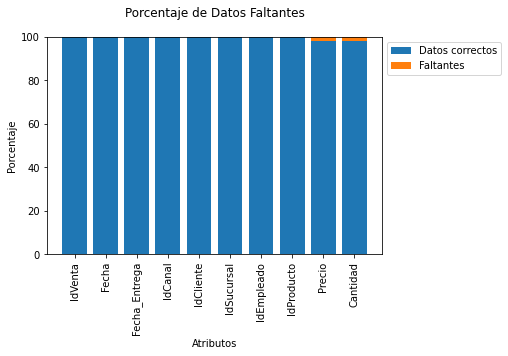

In [12]:
X = result.Atributo
y1 = result["Q_%"]
y2 = result["Q_diff"]
plt.bar(X, y1, label="Datos correctos")
plt.bar(X, y2, bottom=y1, label="Faltantes")

plt.title("Porcentaje de Datos Faltantes", pad=20)
plt.xlabel("Atributos")
plt.ylabel("Porcentaje")
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()

In [81]:
promedio = df_venta[["IdProducto", "Precio"]]
promedio = promedio.groupby(promedio["IdProducto"]).mean().round(2)
promedio

,Precio
IdProducto,
42737,4183.26
42754,3374.35
42755,4641.08
42756,2336.04
42757,4502.23
...,...
43039,1869.71
43040,757.00
43041,1350.27


#### Tabla compra ----------->>

In [20]:
df_compra = pd.read_csv("../Datasets/Compra.csv", sep=",")  ## Bien 


In [3]:
df_compra.head()

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,1/30/2015,2015,1,201501,42832,13,560.51,12
1,2,1/30/2015,2015,1,201501,42833,11,497.58,7
2,3,1/30/2015,2015,1,201501,42834,1,588.50,6
3,4,1/30/2015,2015,1,201501,42835,9,567.66,14
4,5,1/30/2015,2015,1,201501,42839,14,231.31,2


In [5]:
columnas = df_compra.columns
columnas

Index(['IdCompra', 'Fecha', 'Fecha_Año', 'Fecha_Mes', 'Fecha_Periodo',
       'IdProducto', 'Cantidad', 'Precio', 'IdProveedor'],
      dtype='object')

In [6]:
df_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdCompra       11539 non-null  int64  
 1   Fecha          11539 non-null  object 
 2   Fecha_Año      11539 non-null  int64  
 3   Fecha_Mes      11539 non-null  int64  
 4   Fecha_Periodo  11539 non-null  int64  
 5   IdProducto     11539 non-null  int64  
 6   Cantidad       11539 non-null  int64  
 7   Precio         11172 non-null  float64
 8   IdProveedor    11539 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 811.5+ KB


In [7]:
resultado = []
for columna in columnas:
    total = df_compra[columna].count()
    resultado.append(total)
    if total < df_compra.shape[0]:
        print("Esta columna: '"+columna+"' tiene un total de:", total, "registros")
        print("     Fatan:",  df_compra.shape[0] - total)

Esta columna: 'Precio' tiene un total de: 11172 registros
     Fatan: 367


In [8]:
df_compra.shape[0]

11539

In [9]:
totales = pd.Series(resultado)

In [10]:
colum = pd.Series(columnas)
colum

0         IdCompra
1            Fecha
2        Fecha_Año
3        Fecha_Mes
4    Fecha_Periodo
5       IdProducto
6         Cantidad
7           Precio
8      IdProveedor
dtype: object

In [12]:
result = pd.concat([colum, totales], axis=1)
result.rename(columns={0: "Atributo", 1: "Cantidad"}, inplace=True)
result["Total"] = df_compra.shape[0]
result["Q_%"] = result.Cantidad.values / result.Total.values * 100
result["Q_diff"] = 100 - result["Q_%"]
result

,Atributo,Cantidad,Total,Q_%,Q_diff
0,IdCompra,11539,11539,100.000000,0.000000
1,Fecha,11539,11539,100.000000,0.000000
2,Fecha_Año,11539,11539,100.000000,0.000000
3,Fecha_Mes,11539,11539,100.000000,0.000000
4,Fecha_Periodo,11539,11539,100.000000,0.000000
5,IdProducto,11539,11539,100.000000,0.000000
6,Cantidad,11539,11539,100.000000,0.000000
7,Precio,11172,11539,96.819482,3.180518
8,IdProveedor,11539,11539,100.000000,0.000000


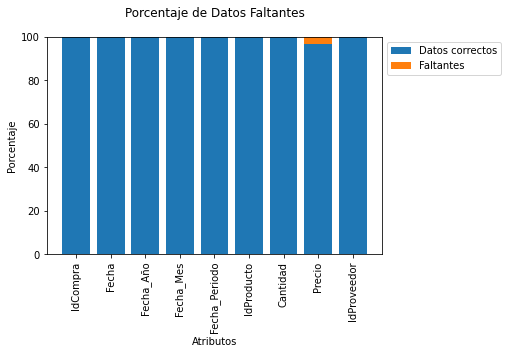

In [13]:
X = result.Atributo
y1 = result["Q_%"]
y2 = result["Q_diff"]
plt.bar(X, y1, label="Datos correctos")
plt.bar(X, y2, bottom=y1, label="Faltantes")

plt.title("Porcentaje de Datos Faltantes", pad=20)
plt.xlabel("Atributos")
plt.ylabel("Porcentaje")
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()

In [16]:
import re

# Formato de fecha para identificar si esta separado por guion medio
date_format = re.compile(r'^[0-9]*\-?[0-9]*\-?[0-9]*$') 

In [49]:
incorrectos = df_compra["Fecha"] == date_format
incorrectos.rename("Error", inplace=True)

0        False
1        False
2        False
3        False
4        False
         ...  
11534    False
11535    False
11536    False
11537    False
11538    False
Name: Error, Length: 11539, dtype: bool

In [30]:
dates = df_compra["Fecha"]

In [62]:
result = pd.concat([dates, incorrectos], axis=1)
result_correctos = result.Error[result.Error == True].count()
result_incorrectos = result.Error[result.Error == False].count()

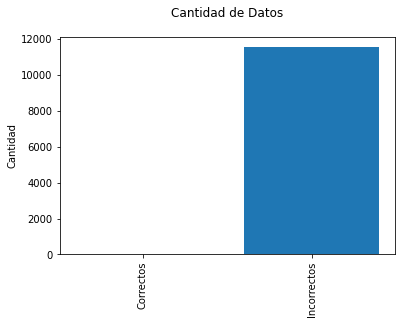

In [71]:
X = ["Correctos", "Incorrectos"]
y1 = [result_correctos, result_incorrectos]
plt.bar(X, y1)

plt.title("Cantidad de Datos", pad=20)
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.show()

In [72]:
df_compra["Fecha"] = df_compra["Fecha"].str.replace("/", "-")
df_compra["Fecha"]

0         1-30-2015
1         1-30-2015
2         1-30-2015
3         1-30-2015
4         1-30-2015
            ...    
11534    12-25-2020
11535    12-25-2020
11536    12-25-2020
11537    12-25-2020
11538    12-25-2020
Name: Fecha, Length: 11539, dtype: object

## Tabla Gastos ----------->>

In [73]:
df_gasto = pd.read_csv("../Datasets/Gasto.csv", sep=",")  ## Bien 


In [86]:
df_gasto.tail()

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto
8635,8636,23,4,2020-12-01,1180.27
8636,8637,24,1,2020-12-01,1152.15
8637,8638,24,2,2020-12-01,305.98
8638,8639,24,3,2020-12-01,104.32
8639,8640,24,4,2020-12-01,1156.31


In [76]:
columnas = df_gasto.columns
columnas

Index(['IdGasto', 'IdSucursal', 'IdTipoGasto', 'Fecha', 'Monto'], dtype='object')

In [77]:
df_gasto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IdGasto      8640 non-null   int64  
 1   IdSucursal   8640 non-null   int64  
 2   IdTipoGasto  8640 non-null   int64  
 3   Fecha        8640 non-null   object 
 4   Monto        8640 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 337.6+ KB


In [78]:
resultado = []
for columna in columnas:
    total = df_gasto[columna].count()
    resultado.append(total)
    if total < df_gasto.shape[0]:
        print("Esta columna: '"+columna+"' tiene un total de:", total, "registros")
        print("     Fatan:",  df_gasto.shape[0] - total)


In [79]:
df_gasto.shape[0]

8640

In [80]:
totales = pd.Series(resultado)

In [81]:
colum = pd.Series(columnas)
colum

0        IdGasto
1     IdSucursal
2    IdTipoGasto
3          Fecha
4          Monto
dtype: object

In [84]:
result = pd.concat([colum, totales], axis=1)
result.rename(columns={0: "Atributo", 1: "Cantidad"}, inplace=True)
result["Total"] = df_gasto.shape[0]
result["Q_%"] = result.Cantidad.values / result.Total.values * 100
result["Q_diff"] = 100 - result["Q_%"]
result

,Atributo,Cantidad,Total,Q_%,Q_diff
0,IdGasto,8640,8640,100.0,0.0
1,IdSucursal,8640,8640,100.0,0.0
2,IdTipoGasto,8640,8640,100.0,0.0
3,Fecha,8640,8640,100.0,0.0
4,Monto,8640,8640,100.0,0.0


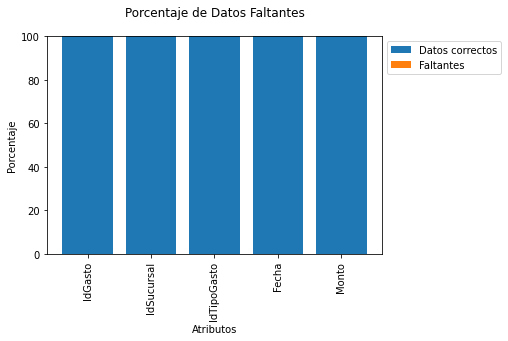

In [85]:
X = result.Atributo
y1 = result["Q_%"]
y2 = result["Q_diff"]
plt.bar(X, y1, label="Datos correctos")
plt.bar(X, y2, bottom=y1, label="Faltantes")

plt.title("Porcentaje de Datos Faltantes", pad=20)
plt.xlabel("Atributos")
plt.ylabel("Porcentaje")
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()